# INTRODUCTION

The Dataset German Credit is taken from the UCI Machine Learning Repository based on 'Statlog Dataset' where UCI is niversity of California, Irvine (UCI or UC Irvine) is a public land-grant research university in Irvine, California. 

The Features or Variables in the dataset are Age, Sex, Job type, Housing, Saving Accounts, Checking Accounts, Credit Amount, Duration and Purpose

**The main aim of this project is to find the credit worthiness of the customers.**

**Features Explanations**

1. Age - Denotes Age of the Credit Person


2. Sex - Gender of the Person either male of female


3. Job - Nature of Person's work in number formats but it denoted as follows:

         0 - unskilled and non-resident

         1 - unskilled and resident

         2 - skilled

         3 - highly skilled
         

4. Housing - Type of Person House which includes own, rent, or free.

5. Saving accounts -  Type of Savings accounts which includes little, moderate, quite rich, rich.


6. Checking account  Type of Savings accounts which includes little, moderate, rich 

7. Credit amount - Credit refers to an agreement to purchase a good or service with the express promise to pay for it later and the amount is in Deutsche Mark

8. Duration - Credit Amount duration set to payback.

9. Purpose - The Goods or Services which are included for purchases like car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others.

In [1]:
# Importing libraries
import numpy as np  # linear algebra
import pandas as pd # For data analysis and data manipulation.
import matplotlib.pyplot as plt  # This library is built on the top of NumPy arrays and consist of several plots like line chart, bar chart, histogram, etc.
import seaborn as sns # Seaborn is a library that uses Matplotlib underneath to plot graphs. It will be used to visualize random distributions.

In [2]:
import warnings
warnings.filterwarnings('ignore')  # This method will ignore all warnings.

# **1. Perform basic exploration of data.**

In [3]:
GC = pd.read_csv("EDA_week_1_mandatory_german_Credit.csv") # To read dataset loaded 

In [ ]:
GC.shape # to find out number of rows and columns in dataset

(1000, 10)

*The DataSet has 1000 rows and 10 columns*

In [4]:
GC.info() # provides information of non-null values and variable datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [5]:
GC = GC.drop(['Unnamed: 0'],axis =1) # Dropped first unnamed column
# GC.drop(columns = 'Unnamed: 0', inplace =True)

*Dropped first column in dataset which is not required for Analysis.*

In [ ]:
GC.head() # Getting first five rows from dataframe

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,2,own,NaN,little,1169,6,radio/TV
1,22,female,2,own,little,moderate,5951,48,radio/TV
2,49,male,1,own,little,NaN,2096,12,education
3,45,male,2,free,little,little,7882,42,furniture/equipment
4,53,male,2,free,little,little,4870,24,car


In [ ]:
GC.tail() # Getting last five rows from dataframe

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,40,male,3,own,little,little,3857,30,car
997,38,male,2,own,little,NaN,804,12,radio/TV
998,23,male,2,free,little,little,1845,45,radio/TV
999,27,male,2,own,moderate,moderate,4576,45,car


In [6]:
GC.size # to check size of dataframe

9000

In [7]:
GC.isnull() # to findout null values where true is null values
# GC.isna()  -> Provides same result

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,True,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,True,False,False,False
998,False,False,False,False,False,False,False,False,False


In [8]:
job_desc = {0:"unskilled and non-resident", 1:"unskilled and resident", 2:"skilled", 3:"higly skilled"}
GC = GC.replace({"Job":job_desc})
GC.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


*As we have job column in numbers which denotes nature of job so replaced with job description for better understanding in analysis.*

In [ ]:
GC.isnull().sum() # to find number of null values for all variables or columns

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

Here we can Savings accounts column has 183 null values and Checking accounts has 394 null values.

In [ ]:
GC.nunique() # nuniuqe function to count unique values in each column

Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64

In [9]:
GC.columns

Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose'],
      dtype='object')

In [10]:
GC.describe(include = 'all') # Checking for the Qualitative measures of the Data

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,4,3,4,3,NaN,NaN,8
top,NaN,male,skilled,own,little,little,NaN,NaN,car
freq,NaN,690,630,713,603,274,NaN,NaN,337
mean,35.546000,NaN,NaN,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,NaN,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,NaN,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,NaN,NaN,NaN,NaN,3972.250000,24.000000,NaN


Use .describe() to view qualitative measures of the data.

For numeric data, the result’s index will include count, unique, top, freq, mean, std, min, max as well as lower, 50 and upper percentiles.

In [11]:
GC.drop_duplicates() # drops rows which are duplicates

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...
995,31,female,unskilled and resident,own,little,NaN,1736,12,furniture/equipment
996,40,male,higly skilled,own,little,little,3857,30,car
997,38,male,skilled,own,little,NaN,804,12,radio/TV
998,23,male,skilled,free,little,little,1845,45,radio/TV


*As we can see that there are no duplicate rows in German Credit DataSet.*

In [12]:
GC.duplicated().sum() #Checking for duplicates

0

# **2. Perform exploratory data analysis and provide key insights derived from the same, backed with suitable graphs and plots. Perform univariate, bivariate and multivariate analysis.**



*In the DataSet numerical variables are Age, Credit amount and Duration(in months)*

In [ ]:
GC.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


# **Univariate Analysis**

*Univariate analysis means you have only one outcome variable, but may have multiple independent variables.*

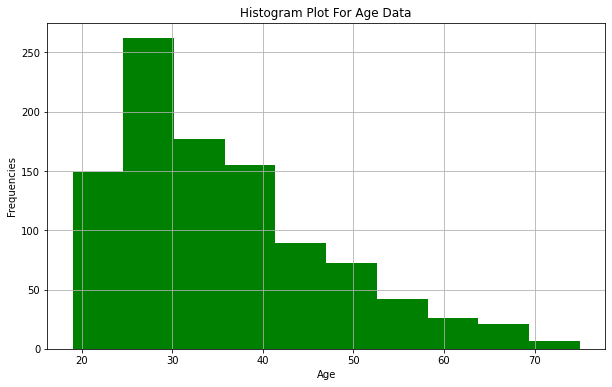

In [ ]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
plt.hist(GC["Age"], color='Green')
plt.title("Histogram Plot For Age Data") # Title of the Plot
plt.xlabel("Age")
plt.ylabel("Frequencies")
plt.grid(True)
plt.show()

Histogram Plot is used to see the distribution of a numerical value.

*From the plot, we can observe that credits are taken by the people majorly between 25-35 Age.*

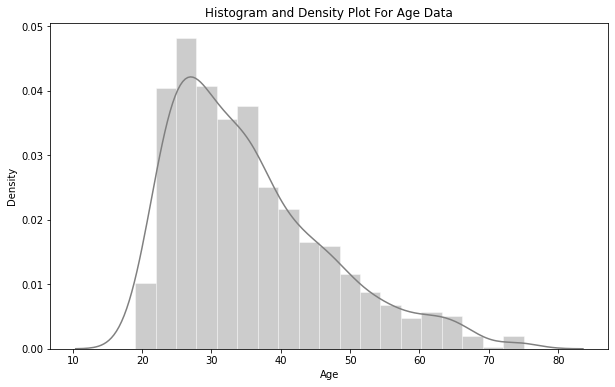

In [ ]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
plt.title("Histogram and Density Plot For Age Data")
sns.distplot(a=GC.Age, color='grey',
             hist_kws={"edgecolor": 'white'})

From the density and histogram plot we can observe that distribution is right skewed.

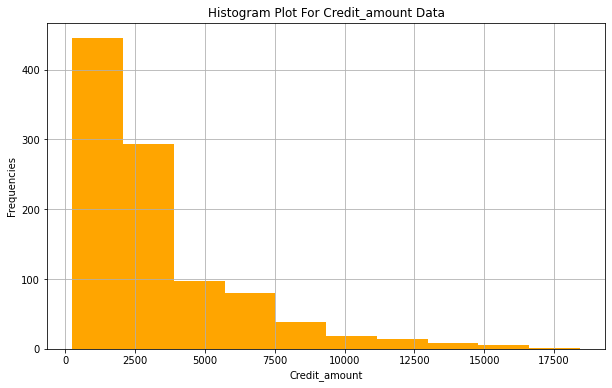

In [ ]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
plt.hist(GC["Credit amount"], color='Orange')
plt.title("Histogram Plot For Credit_amount Data")
plt.xlabel("Credit_amount")
plt.ylabel("Frequencies")
plt.grid(True)
plt.show()

The plot says Credit_amount is decreasing in the dataset German Credit.

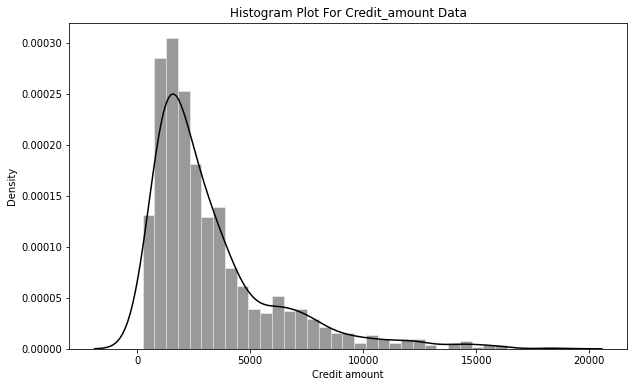

In [ ]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
plt.title("Histogram Plot For Credit_amount Data")
sns.distplot(GC["Credit amount"], color='black',
             hist_kws={"edgecolor": 'white'})

From the box plot, we can see that the distribution is right skewed.

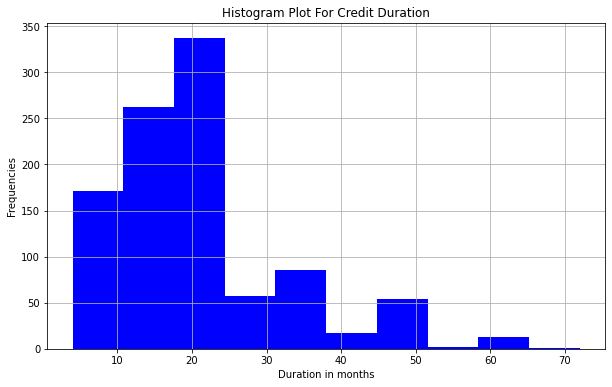

In [ ]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
plt.hist(GC["Duration"], color='Blue')
plt.title("Histogram Plot For Credit Duration")
plt.xlabel("Duration in months")
plt.ylabel("Frequencies")
plt.grid(True)
plt.show()

*From the plot, we can able to find that high number of credits were present in the duration of 1-2 years.*

As from box plot, we can see there are Outliers and also the median value is below 20 approximately around 18.

<Figure size 720x432 with 0 Axes>

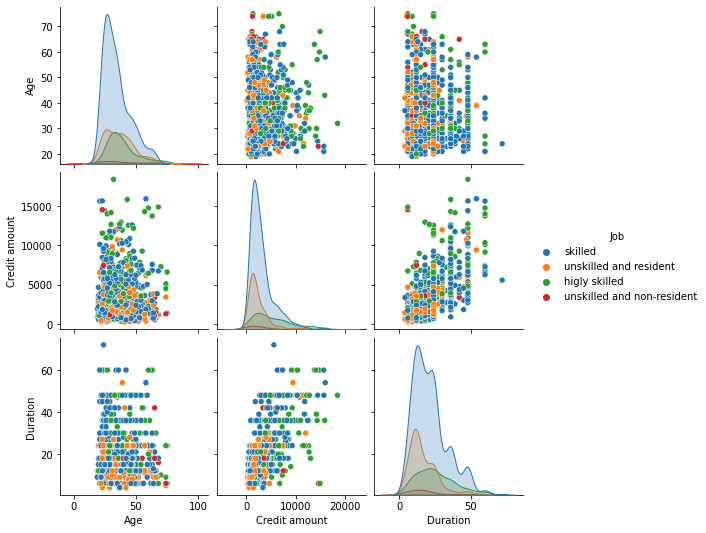

In [16]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
num_cat = ['Age', 'Credit amount', 'Duration', 'Job']
sns.pairplot(GC[num_cat], hue="Job")
plt.show()

*The distribution plots for Age, Credit amount, and Duration have a positive skew*

**Categorical Data**

We have six variables which are categorical as follows: Sex, Job, Housing, Saving accounts, Checking account, Purpose.

# **Bivariate Analysis**

**Bivariate Analysis**

*Bi means two variables. Analyzing two variables. For example: Correlation analysis and scatter plot.*

In [ ]:
GC_cat = GC[['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account','Purpose']]

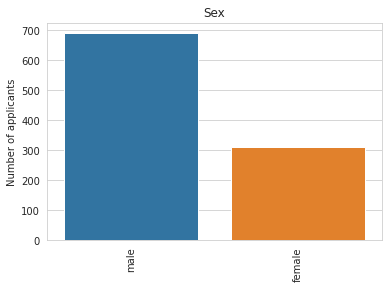

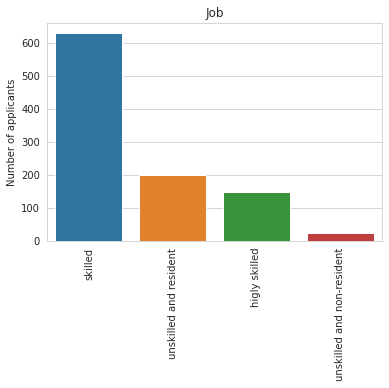

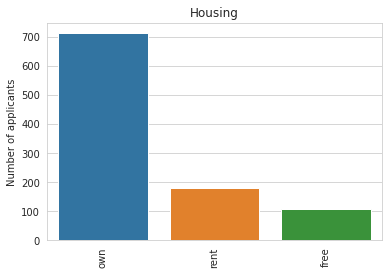

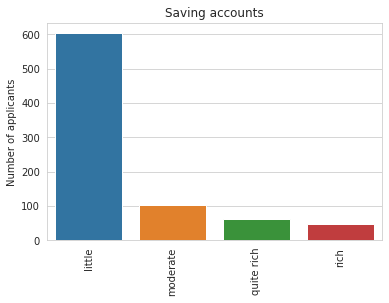

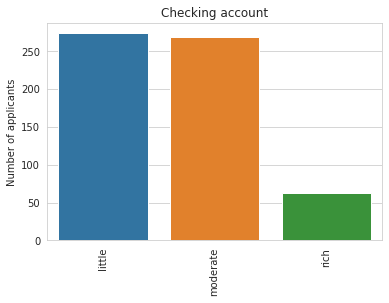

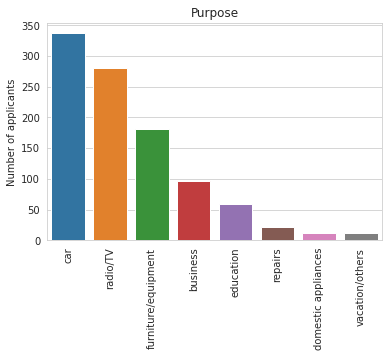

In [ ]:
for i in GC_cat.columns:
    cat_num = GC_cat[i].value_counts()
    title = cat_num.name
    cat_num.name = "Number of applicants"
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    
    chart.y ="Number of applicants"
    plt.title(title)
    plt.show()

**Observations from the Categorical Columns in above bar plots**


Men had more applications for credit Score

Skilled Workers had more applications for credit

People who owned houses had more applications for credit

Poor people applied for more applications for credit

Maximum applications were for cars, radio/TV and furniture/equipment

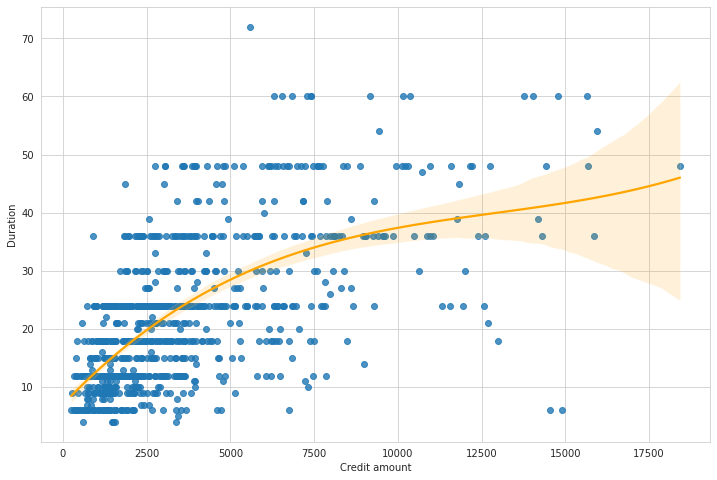

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.regplot(x=GC["Credit amount"], y=GC["Duration"],order=3, line_kws={"color":"orange"})

*From the plot We can see that it is an upward trend between Credit amount and Duration and then slows down as it reaches the 40 month mark. This shows that people didn't prefer to take big credits for large amount of time.*

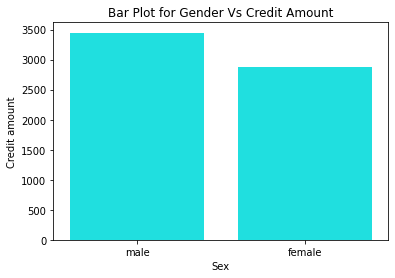

In [17]:
sns.barplot(data = GC, x = 'Sex', y = 'Credit amount', color = 'cyan',ci = None)
plt.title("Bar Plot for Gender Vs Credit Amount") # title
plt.show()

As we can see that credit amount of men value is higher than the female

Text(0.5, 1.0, 'Box Plot for Job & Credit amount')

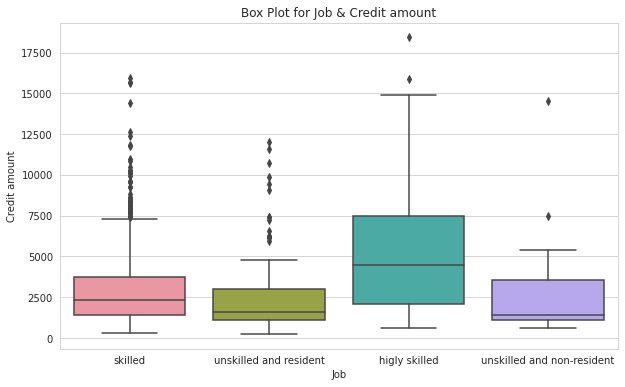

In [ ]:
plt.figure(figsize=(10,6))# setting the figuresize
# Box plot
sns.set_style("whitegrid")
sns.boxplot(x = 'Job', y = 'Credit amount', data = GC)
plt.xlabel("Job")
plt.ylabel("Credit amount")
plt.title("Box Plot for Job & Credit amount")

From the box plot we can observe that outliers are present in skilled, Highly skilled 

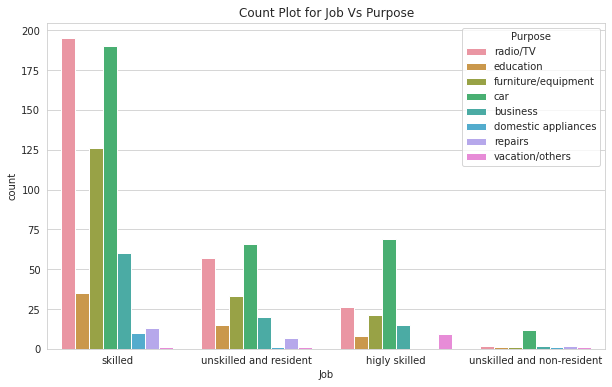

In [ ]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
sns.set_palette("hls", 3)
sns.countplot(x='Job', hue='Purpose', data=GC)
plt.title("Count Plot for Job Vs Purpose")
plt.show()

As we can observe from above plot, Skilled people were able to get more credit worthiness among the others.

**MultiVariate Analysis**

In [ ]:
GC.corr() # selecting the method as a pearson

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


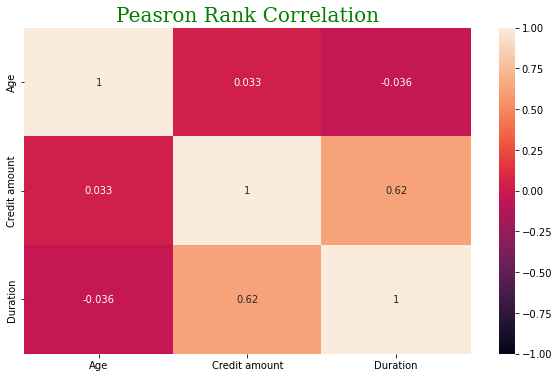

In [ ]:
# pearson rank correlation heatmap

GC.corr()# selecting the method as a pearson
plt.figure(figsize=(10,6))# setting the figuresize

heatmap = sns.heatmap(GC.corr().round(3), vmin=-1, 
vmax=1, annot=True)# annot = True means writting the data value in each cell.

font2= {'family':'serif','color':'green','size':20}
plt.title("Peasron Rank Correlation",font2)
plt.show()# displaying heatmap

*It can be observed that duration and Credit amount are moderately correlated and age has a small very little correaltion to both.*

In [ ]:
GC.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,67,male,skilled,own,NaN,little,1169,6,radio/TV
1,22,female,skilled,own,little,moderate,5951,48,radio/TV
2,49,male,unskilled and resident,own,little,NaN,2096,12,education
3,45,male,skilled,free,little,little,7882,42,furniture/equipment
4,53,male,skilled,free,little,little,4870,24,car


<Figure size 864x576 with 0 Axes>

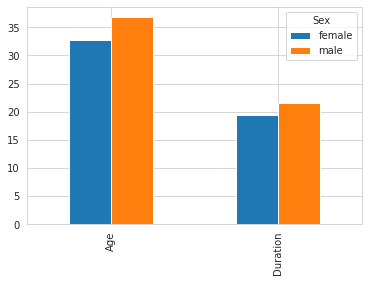

In [ ]:
# Creating plot
fig = plt.figure(figsize=(12,8))
GC.groupby("Sex").mean()[["Age", "Duration"]].T.plot(kind="bar")

As we can observe Male has taken more credit compared to females

<Figure size 864x576 with 0 Axes>

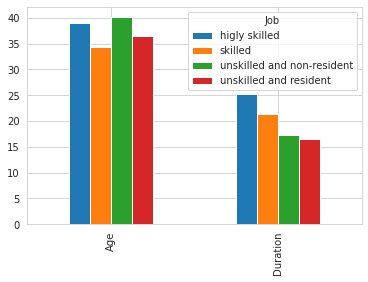

In [ ]:
# Creating plot
fig = plt.figure(figsize=(12,8))
GC.groupby("Job").mean()[["Age", "Duration"]].T.plot(kind="bar")

*We see that highly skilled and skilled workers took longer duration credit from banks. In age we don't see much of a difference as all job classes were between 30-40.*

<Figure size 864x576 with 0 Axes>

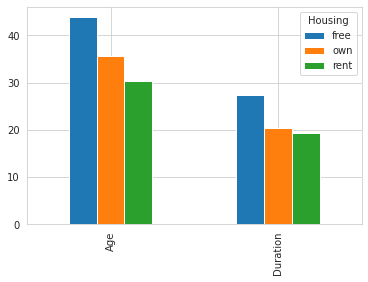

In [ ]:
# Creating plot
fig = plt.figure(figsize=(12,8))
GC.groupby("Housing").mean()[["Age", "Duration"]].T.plot(kind="bar")

From the bar plot, we can observe people who live in free housing were of higher age.

<Figure size 864x576 with 0 Axes>

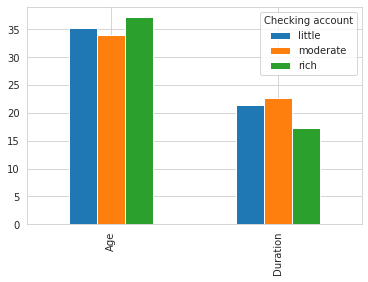

In [ ]:
# Creating plot
fig = plt.figure(figsize=(12,8))
GC.groupby("Checking account").mean()[["Age", "Duration"]].T.plot(kind="bar")

*We can see that the middle class took higher amount of credit and at a higher frequency.*

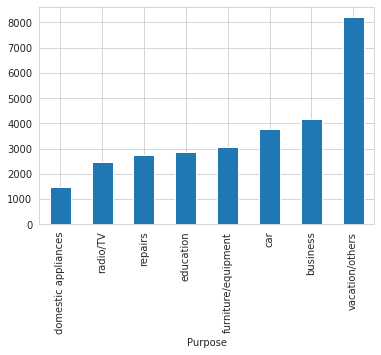

In [ ]:
GC.groupby("Purpose",sort=True).mean()["Credit amount"].T.sort_values().plot(kind="bar")

*Highest amount of credit was taken for Vacation and Others purposes.*

# **3. Conduct the following steps only as necessary along with the reason behind doing it with suitable steps:**

Missing values

Erroneous/wrong values

Skewed data and outliers 

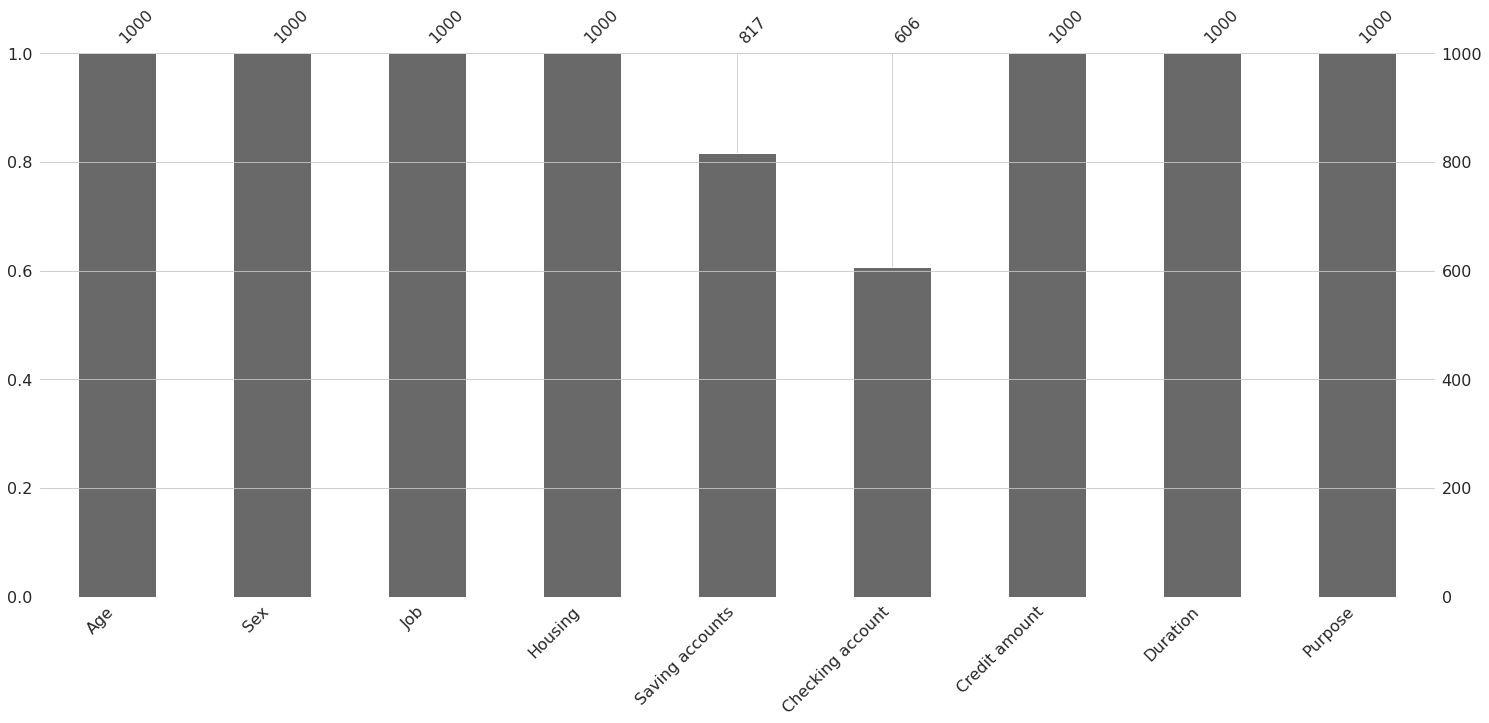

In [ ]:
import missingno as msno # The missingno library in python offers many functions using which you can plot different graphs to visualize the missing values data
msno.bar(GC)

Here we can saving accounts and Checking account columns has missing values.

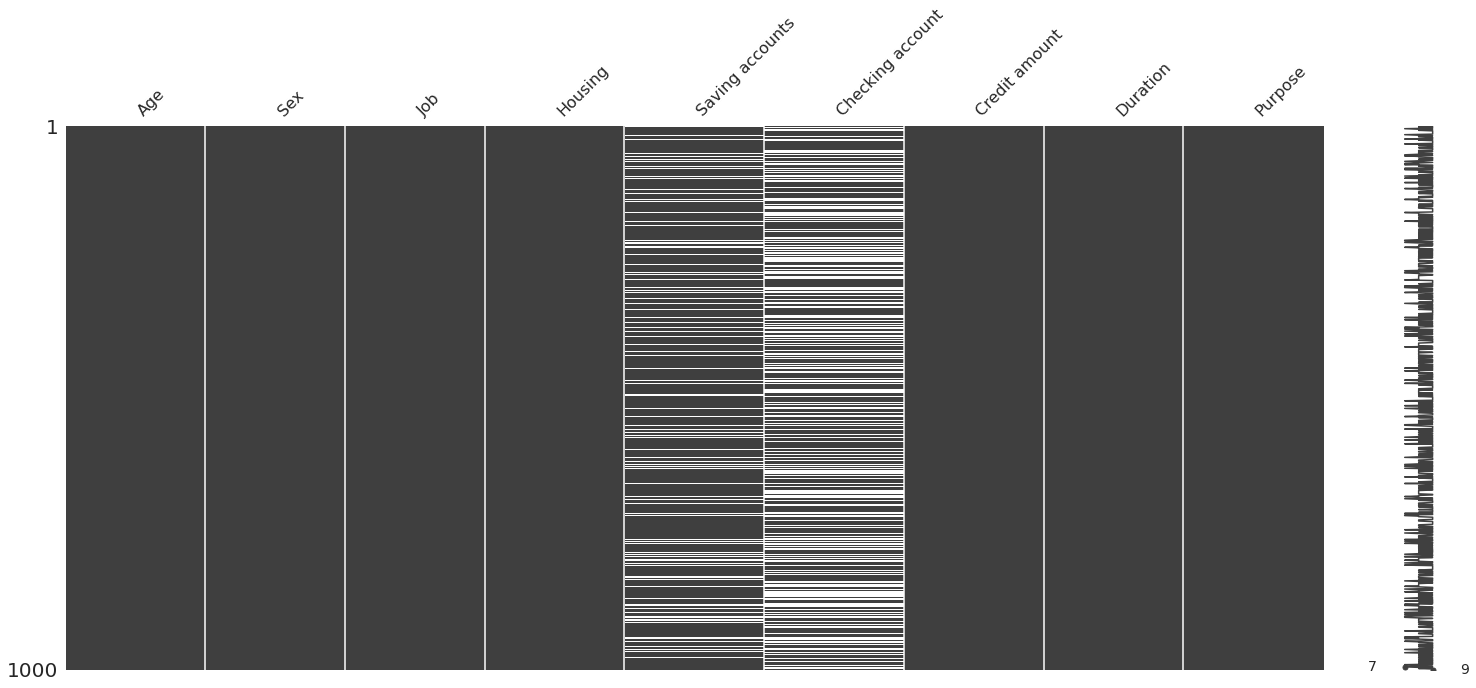

In [ ]:
# creating matrix plot to see the pattern in missing values 
msno.matrix(GC)

As we can observe clearly from both bar and matrix figures that Savings account and Checking account has large number of missing values 

In [ ]:
GC.describe(include ='all')

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000,1000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,2,4,3,4,3,NaN,NaN,8
top,NaN,male,skilled,own,little,little,NaN,NaN,car
freq,NaN,690,630,713,603,274,NaN,NaN,337
mean,35.546000,NaN,NaN,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,11.375469,NaN,NaN,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,19.000000,NaN,NaN,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,27.000000,NaN,NaN,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,33.000000,NaN,NaN,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,42.000000,NaN,NaN,NaN,NaN,NaN,3972.250000,24.000000,NaN


**Cleaning Missing Values**

In [ ]:
GC.isnull().sum() # To Check count of missing values

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

There are 183 missing values in the Saving accounts column

There are 394 missing values in the Checking account column

The values in the Checking and Saving accounts columns are categorical so lets check what values are present in these two columns exactly in below.

In [ ]:
print("Saving accounts", GC['Saving accounts'].unique())
print("Checking accounts", GC['Checking account'].unique())

Saving accounts [nan 'little' 'quite rich' 'rich' 'moderate']
Checking accounts ['little' 'moderate' nan 'rich']


By dropping the rows with null values, the dataset will lose 577 instances which are more than half. That’s a significant loss of data. To avoid this, lets replace the null values with none. It’s possible that the applicants with null values didn’t have a saving or checking account at the time of the application.

In [28]:
df1 = GC.copy() # Created copy of original dataframe GC into df new dataframe

In [29]:
df1["Saving accounts"].fillna("none", inplace=True) # replacing with none value
df1["Checking account"].fillna("none", inplace=True)
df1.isna().any()

Age                 False
Sex                 False
Job                 False
Housing             False
Saving accounts     False
Checking account    False
Credit amount       False
Duration            False
Purpose             False
Age_log             False
Duration_log        False
dtype: bool

In [30]:
df1.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Age_log             0
Duration_log        0
dtype: int64

*As we can see that missing values are showing Zero as we have replaced null values with Zero in Saving accounts and Checking account.*

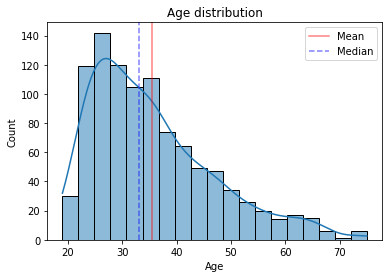

In [19]:
sns.histplot(data = GC['Age'], kde = True)
plt.axvline(x=GC.Age.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=GC.Age.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.title('Age distribution')
plt.legend()

Applicants between the ages of 20 to 30 are more likely to apply for a loan

**Log Transformation**

Data transformation is the process of taking a mathematical function and applying it to the data.

The log transformation can be used to make highly skewed distributions less skewed.

In [22]:
#create log-transformed data
GC['Age_log'] = np.log(GC['Age'])

Text(0.5, 1.0, 'Log Transformation of Age')

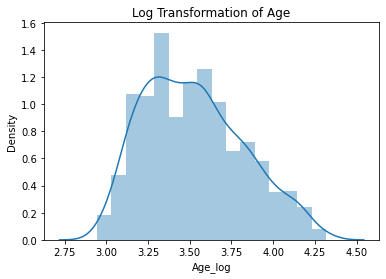

In [23]:
sns.distplot(GC['Age_log'])
plt.title('Log Transformation of Age')

After Log transformation, now distribution is normal and less skewed.

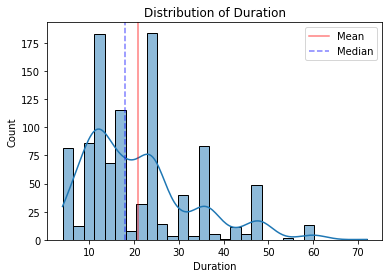

In [24]:
sns.histplot(data = GC['Duration'], kde = True)
plt.axvline(x=GC.Duration.mean(),color='red',alpha=0.5,label='Mean')
plt.axvline(x=GC.Duration.median(),c='blue',ls='--',alpha=0.5,label='Median')
plt.title('Distribution of Duration')
plt.legend()

*More loans have been paid off around 20 months after being issued*

Text(0.5, 1.0, 'Log Transformation of Duration')

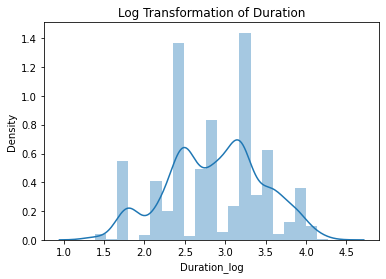

In [25]:
#create log-transformed data
GC['Duration_log'] = np.log(GC['Duration'])
sns.distplot(GC['Duration_log'])
plt.title('Log Transformation of Duration')

*After Log transformation, now distribution is normal and less skewed.*

*Applicants are less likely to apply for a high credit loan*

***Erroneous/wrong values- There are no such incorrect or wrong values that are entered in Dataset.***

**Skewed data and outliers**

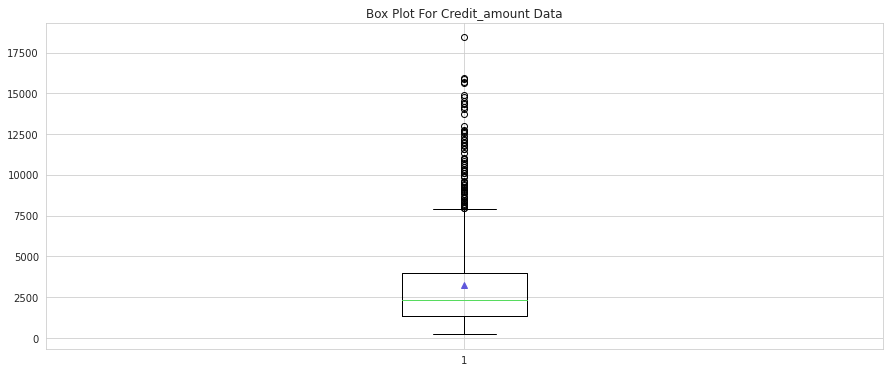

In [85]:
#plotting the data
plt.figure(figsize=(15,6))# setting the figuresize
plt.title("Box Plot For Credit_amount Data")
plt.boxplot(GC["Credit amount"], showmeans = True)
plt.grid(True)
plt.show()

As we can see that there are extreme outliers in the Credit amount and also the value of median is below 2500 from the box plot above.

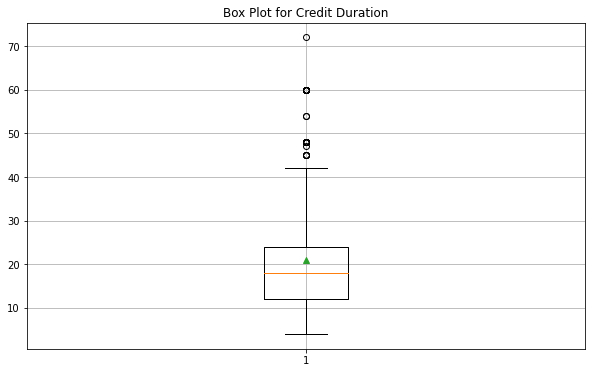

In [45]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
plt.boxplot(GC["Duration"], showmeans = True)
plt.title("Box Plot for Credit Duration")
plt.grid(True)
plt.show()

As from box plot, we can see there are Outliers and also the median value is below 20 approximately around 18.

# **4. How many highly skilled men (below 35 years) are staying in their own house?**

"*After Looking at the data German Credit, there are 28 highly skilled people who are staying in own house having age below 35 years*"

# **5. Visualize men and females separately for their social status.**

In [53]:
female_df = GC[GC['Sex'] == 'female'] # Creating new dataframe to contain only female under Sex Column
male_df = GC[GC['Sex'] == 'male'] # Creating new dataframe to contain only male under Sex Column

Separated Male and Females are created as separate dataframes in order to visualize their social status which may includes Purpose,Saving accounts, Checking account.

As there is no Social Status Column so used Purpose column which is also can be considered as a Status for the people 

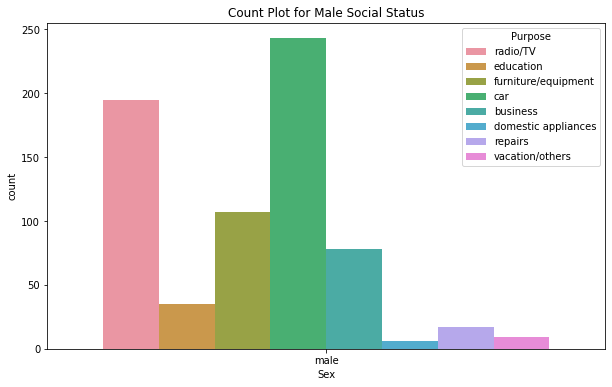

In [77]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
sns.set_palette("hls", 3)
sns.countplot(x='Sex', hue='Purpose', data=male_df)
plt.title("Count Plot for Male Social Status")
plt.show()

From the Plot, We can Observe that Car has been used by most of the men's where Domestic Appliance being the lowest among all Purposes.

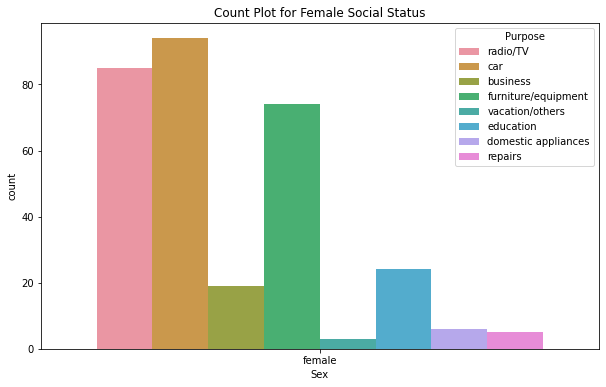

In [78]:
#plotting the data
plt.figure(figsize=(10,6))# setting the figuresize
sns.set_palette("hls", 3)
sns.countplot(x='Sex', hue='Purpose', data=female_df)
plt.title("Count Plot for Female Social Status")
plt.show()

From the Plot, We can Observe that Car has been used by most of the female's where other appliances and vacation being the lowest among all Purposes.

# Conclusion


**1. As credit amount went higher than duration for the credit also went up**

**2. People didn't preferred to take high credits for large amount of time**

**3. We can see that highly skilled workers took greater credit amount than others even though they applied for less no. of applications**

**4. The biggest contribution of applications for credit were for car and also there are people who didn't have house where applying to get cars.**